In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical, plot_model
from keras.optimizers import SGD #Stochastic Gradient Descent

import pickle

2023-01-24 12:52:54.518556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# prepare gray scale data
data_gray_file = open('./archive/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archive/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)


In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = data_color['y_train']
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [4]:
def plotConfusionMatrix(y_true, y_pred):
    y_pred1 = np.argmax(y_pred, axis=1)
    y_true1=np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true=y_true1, y_pred=y_pred1)

    plt.figure(figsize=(14,12))
    sns.heatmap(cm, cmap=mpl.cm.Blues)

# DNN

Daten reshapen damit sie als Vektor statt als 4D Array vorliegen

In [5]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


# Dropouts

# Netze ohne Dropout

Epoch 1/250
680/680 [==============================] - 3s 4ms/step - loss: 1.9185 - accuracy: 0.5106 - val_loss: 1.1825 - val_accuracy: 0.6880
Epoch 2/250
680/680 [==============================] - 3s 4ms/step - loss: 0.9810 - accuracy: 0.7804 - val_loss: 0.9795 - val_accuracy: 0.7477
Epoch 3/250
680/680 [==============================] - 3s 4ms/step - loss: 0.7536 - accuracy: 0.8331 - val_loss: 0.7942 - val_accuracy: 0.8041
Epoch 4/250
680/680 [==============================] - 3s 4ms/step - loss: 0.6278 - accuracy: 0.8579 - val_loss: 0.8146 - val_accuracy: 0.7941
Epoch 5/250
680/680 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.8768 - val_loss: 0.7467 - val_accuracy: 0.8106
Epoch 6/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.8874 - val_loss: 0.7197 - val_accuracy: 0.8245
Epoch 7/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4146 - accuracy: 0.8995 - val_loss: 0.7053 - val_accuracy: 0.8393

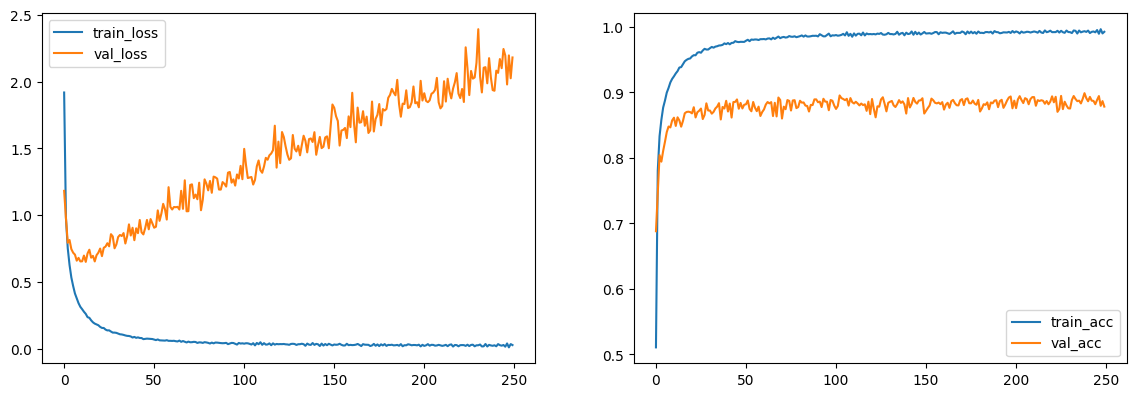

In [33]:
dnn_no_dropout = Sequential()
dnn_no_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_no_dropout.add(Dense(32, activation='relu'))
dnn_no_dropout.add(Dense(64, activation='relu'))
dnn_no_dropout.add(Dense(43, activation='softmax'))

dnn_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_no_dropout_history = dnn_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 2s 2ms/step - loss: 1.8675 - accuracy: 0.5249 - val_loss: 1.0976 - val_accuracy: 0.6953
Epoch 2/250
680/680 [==============================] - 1s 2ms/step - loss: 0.8929 - accuracy: 0.7992 - val_loss: 0.8470 - val_accuracy: 0.7829
Epoch 3/250
680/680 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.8440 - val_loss: 0.8081 - val_accuracy: 0.7919
Epoch 4/250
680/680 [==============================] - 1s 2ms/step - loss: 0.5974 - accuracy: 0.8627 - val_loss: 0.7398 - val_accuracy: 0.8200
Epoch 5/250
680/680 [==============================] - 1s 2ms/step - loss: 0.5124 - accuracy: 0.8782 - val_loss: 0.7751 - val_accuracy: 0.8184
Epoch 6/250
680/680 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8911 - val_loss: 0.7077 - val_accuracy: 0.8322
Epoch 7/250
680/680 [==============================] - 1s 2ms/step - loss: 0.4125 - accuracy: 0.9001 - val_loss: 0.6792 - val_accuracy: 0.8478

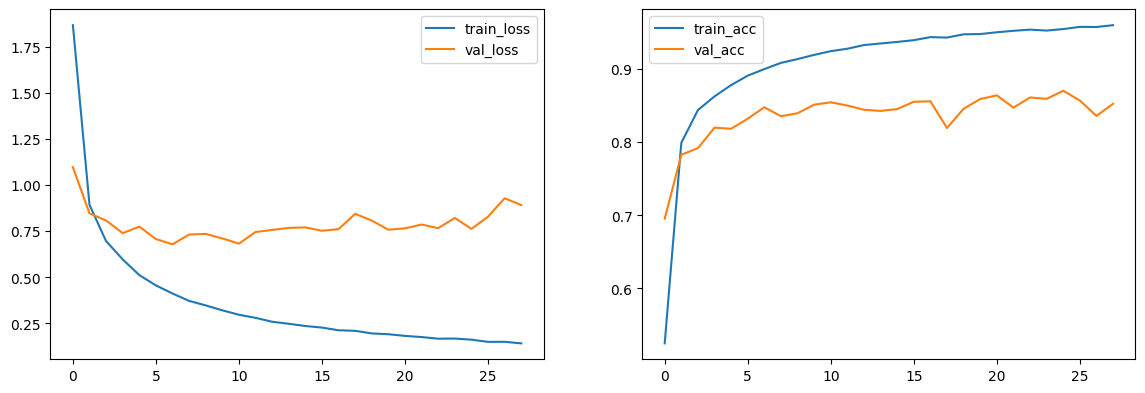

In [57]:
dnn_no_dropout = Sequential()
dnn_no_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_no_dropout.add(Dense(32, activation='relu'))
dnn_no_dropout.add(Dense(64, activation='relu'))
dnn_no_dropout.add(Dense(43, activation='softmax'))

dnn_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

dnn_no_dropout_history = dnn_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray),
    callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Netze mit Dropout

Epoch 1/250
680/680 [==============================] - 2s 3ms/step - loss: 3.7629 - accuracy: 0.0218 - val_loss: 3.7617 - val_accuracy: 0.0356
Epoch 2/250
680/680 [==============================] - 2s 2ms/step - loss: 3.7583 - accuracy: 0.0228 - val_loss: 3.6733 - val_accuracy: 0.0467
Epoch 3/250
680/680 [==============================] - 2s 2ms/step - loss: 3.6471 - accuracy: 0.0351 - val_loss: 3.3979 - val_accuracy: 0.0443
Epoch 4/250
680/680 [==============================] - 2s 2ms/step - loss: 3.6085 - accuracy: 0.0389 - val_loss: 3.4364 - val_accuracy: 0.0554
Epoch 5/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5964 - accuracy: 0.0418 - val_loss: 3.3655 - val_accuracy: 0.0659
Epoch 6/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5888 - accuracy: 0.0432 - val_loss: 3.4238 - val_accuracy: 0.0724
Epoch 7/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5831 - accuracy: 0.0446 - val_loss: 3.4537 - val_accuracy: 0.0435

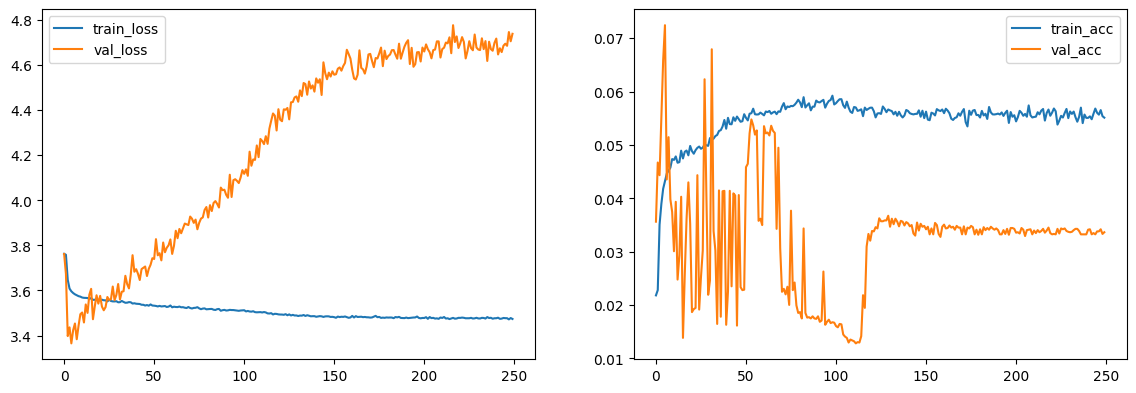

In [59]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(32, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(64, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 5s 7ms/step - loss: 3.5220 - accuracy: 0.0555 - val_loss: 2.8333 - val_accuracy: 0.2038
Epoch 2/250
680/680 [==============================] - 5s 7ms/step - loss: 3.0600 - accuracy: 0.1068 - val_loss: 2.5416 - val_accuracy: 0.2652
Epoch 3/250
680/680 [==============================] - 6s 8ms/step - loss: 2.9494 - accuracy: 0.1279 - val_loss: 2.4803 - val_accuracy: 0.3044
Epoch 4/250
680/680 [==============================] - 5s 8ms/step - loss: 2.9011 - accuracy: 0.1404 - val_loss: 2.4159 - val_accuracy: 0.3273
Epoch 5/250
680/680 [==============================] - 6s 8ms/step - loss: 2.8556 - accuracy: 0.1544 - val_loss: 2.3370 - val_accuracy: 0.3395
Epoch 6/250
680/680 [==============================] - 7s 10ms/step - loss: 2.8319 - accuracy: 0.1640 - val_loss: 2.3507 - val_accuracy: 0.3023
Epoch 7/250
680/680 [==============================] - 8s 11ms/step - loss: 2.8085 - accuracy: 0.1708 - val_loss: 2.4024 - val_accuracy: 0.26

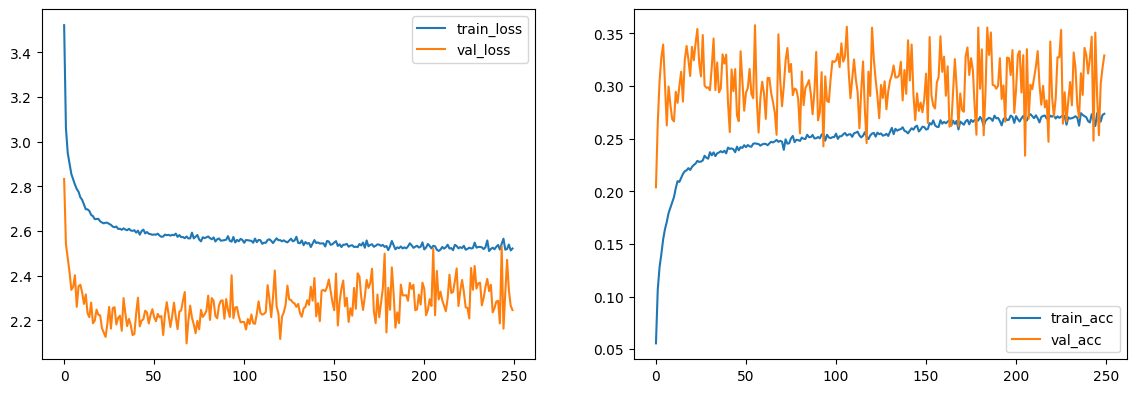

In [35]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(256, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(128, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(64, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Zu großer Dropout & zu kleines Netz für die komplexen Daten

Epoch 1/250
680/680 [==============================] - 20s 29ms/step - loss: 2.8319 - accuracy: 0.1942 - val_loss: 1.5610 - val_accuracy: 0.5721
Epoch 2/250
680/680 [==============================] - 22s 32ms/step - loss: 1.7698 - accuracy: 0.4558 - val_loss: 1.0669 - val_accuracy: 0.7150
Epoch 3/250
680/680 [==============================] - 19s 28ms/step - loss: 1.4655 - accuracy: 0.5542 - val_loss: 0.9158 - val_accuracy: 0.7367
Epoch 4/250
680/680 [==============================] - 20s 29ms/step - loss: 1.3145 - accuracy: 0.6024 - val_loss: 0.7948 - val_accuracy: 0.7722
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 1.2397 - accuracy: 0.6244 - val_loss: 0.7923 - val_accuracy: 0.7587
Epoch 6/250
680/680 [==============================] - 20s 29ms/step - loss: 1.1709 - accuracy: 0.6484 - val_loss: 0.7164 - val_accuracy: 0.7930
Epoch 7/250
680/680 [==============================] - 21s 31ms/step - loss: 1.1219 - accuracy: 0.6639 - val_loss: 0.7720 - val_ac

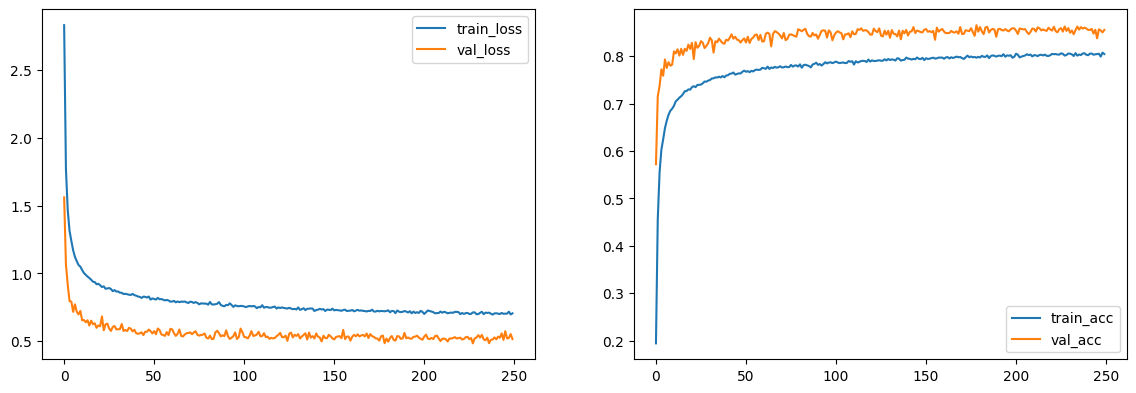

In [36]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(800, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(400, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(200, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 18s 25ms/step - loss: 2.7291 - accuracy: 0.2182 - val_loss: 1.5123 - val_accuracy: 0.5549
Epoch 2/250
680/680 [==============================] - 17s 24ms/step - loss: 1.6445 - accuracy: 0.4942 - val_loss: 1.0455 - val_accuracy: 0.7160
Epoch 3/250
680/680 [==============================] - 18s 26ms/step - loss: 1.3604 - accuracy: 0.5864 - val_loss: 0.8921 - val_accuracy: 0.7479
Epoch 4/250
680/680 [==============================] - 19s 28ms/step - loss: 1.2287 - accuracy: 0.6271 - val_loss: 0.7323 - val_accuracy: 0.7915
Epoch 5/250
680/680 [==============================] - 19s 29ms/step - loss: 1.1298 - accuracy: 0.6621 - val_loss: 0.7049 - val_accuracy: 0.7912
Epoch 6/250
680/680 [==============================] - 20s 29ms/step - loss: 1.0648 - accuracy: 0.6818 - val_loss: 0.6623 - val_accuracy: 0.8038
Epoch 7/250
680/680 [==============================] - 20s 30ms/step - loss: 1.0154 - accuracy: 0.6998 - val_loss: 0.6504 - val_ac

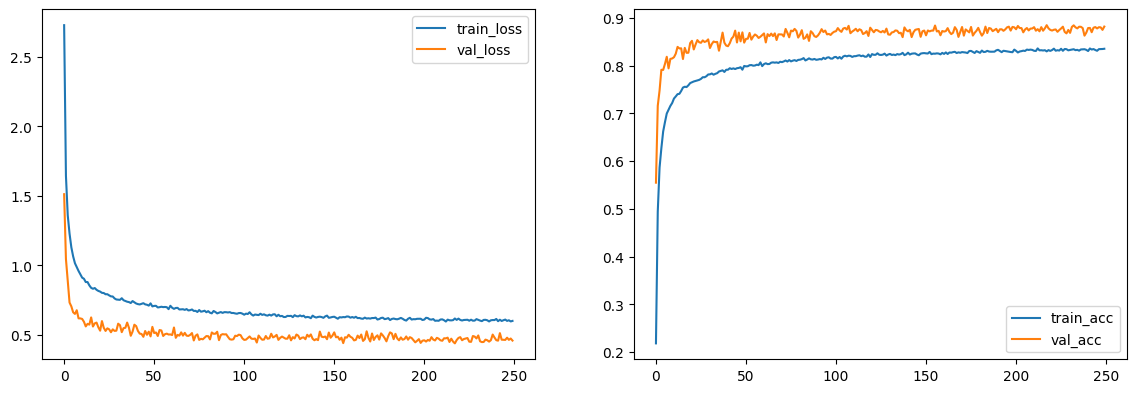

In [37]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 16s 22ms/step - loss: 1.6781 - accuracy: 0.5270 - val_loss: 0.7361 - val_accuracy: 0.7937
Epoch 2/250
680/680 [==============================] - 18s 26ms/step - loss: 0.6751 - accuracy: 0.8049 - val_loss: 0.5615 - val_accuracy: 0.8492
Epoch 3/250
680/680 [==============================] - 18s 27ms/step - loss: 0.5151 - accuracy: 0.8510 - val_loss: 0.5440 - val_accuracy: 0.8470
Epoch 4/250
680/680 [==============================] - 116s 171ms/step - loss: 0.4349 - accuracy: 0.8738 - val_loss: 0.4182 - val_accuracy: 0.8890
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 0.3776 - accuracy: 0.8897 - val_loss: 0.4226 - val_accuracy: 0.8856
Epoch 6/250
680/680 [==============================] - 17s 25ms/step - loss: 0.3466 - accuracy: 0.8967 - val_loss: 0.4296 - val_accuracy: 0.8815
Epoch 7/250
680/680 [==============================] - 18s 26ms/step - loss: 0.3137 - accuracy: 0.9071 - val_loss: 0.3760 - val_

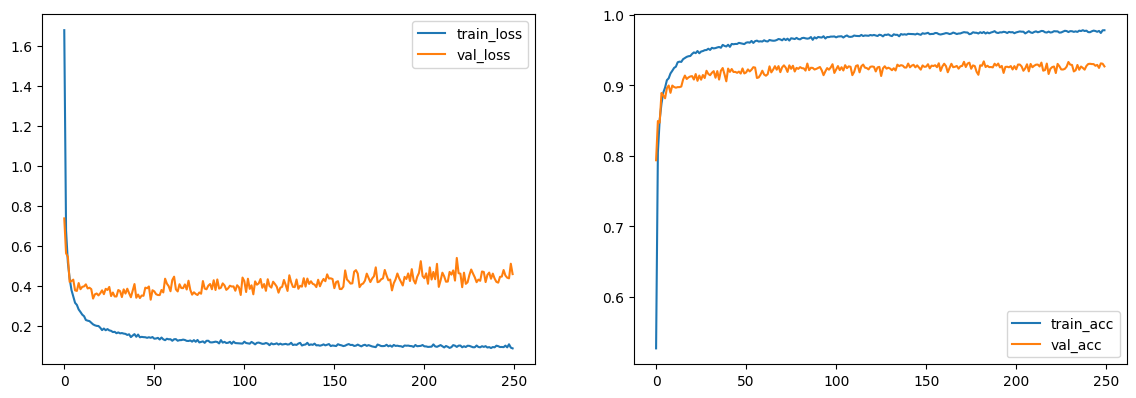

In [38]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.3))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.3))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.3))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 19s 26ms/step - loss: 2.0809 - accuracy: 0.4084 - val_loss: 0.9152 - val_accuracy: 0.7314
Epoch 2/250
680/680 [==============================] - 20s 30ms/step - loss: 0.9867 - accuracy: 0.7101 - val_loss: 0.7041 - val_accuracy: 0.7955
Epoch 3/250
680/680 [==============================] - 20s 29ms/step - loss: 0.7875 - accuracy: 0.7680 - val_loss: 0.5829 - val_accuracy: 0.8316
Epoch 4/250
680/680 [==============================] - 19s 28ms/step - loss: 0.6859 - accuracy: 0.7975 - val_loss: 0.5557 - val_accuracy: 0.8443
Epoch 5/250
680/680 [==============================] - 18s 26ms/step - loss: 0.6303 - accuracy: 0.8142 - val_loss: 0.4854 - val_accuracy: 0.8600
Epoch 6/250
680/680 [==============================] - 17s 26ms/step - loss: 0.5721 - accuracy: 0.8322 - val_loss: 0.4679 - val_accuracy: 0.8679
Epoch 7/250
680/680 [==============================] - 18s 26ms/step - loss: 0.5403 - accuracy: 0.8412 - val_loss: 0.4586 - val_ac

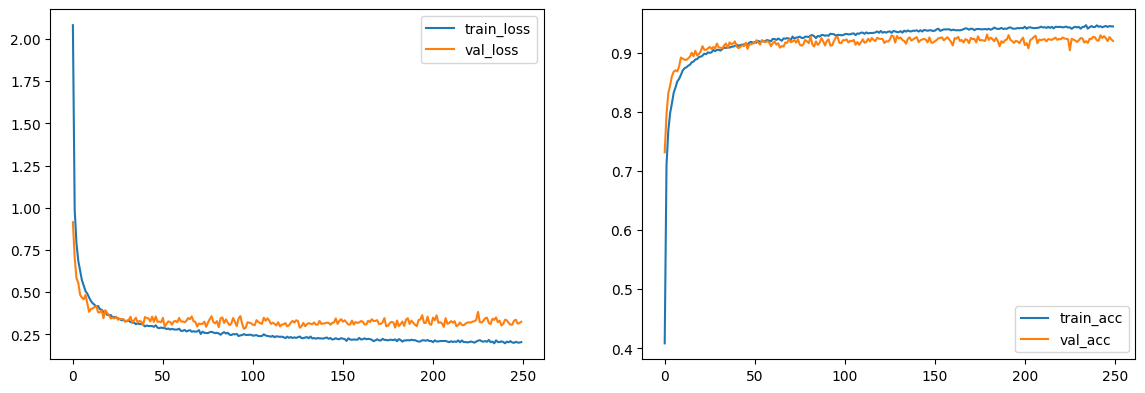

In [39]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 19s 25ms/step - loss: 2.4762 - accuracy: 0.2985 - val_loss: 1.0981 - val_accuracy: 0.6937
Epoch 2/250
680/680 [==============================] - 17s 25ms/step - loss: 1.2923 - accuracy: 0.6113 - val_loss: 0.7722 - val_accuracy: 0.7722
Epoch 3/250
680/680 [==============================] - 18s 26ms/step - loss: 1.0353 - accuracy: 0.6894 - val_loss: 0.6958 - val_accuracy: 0.7948
Epoch 4/250
680/680 [==============================] - 17s 25ms/step - loss: 0.9133 - accuracy: 0.7291 - val_loss: 0.6013 - val_accuracy: 0.8264
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 0.8403 - accuracy: 0.7487 - val_loss: 0.5591 - val_accuracy: 0.8314
Epoch 6/250
680/680 [==============================] - 17s 25ms/step - loss: 0.7887 - accuracy: 0.7666 - val_loss: 0.5341 - val_accuracy: 0.8349
Epoch 7/250
680/680 [==============================] - 19s 28ms/step - loss: 0.7525 - accuracy: 0.7782 - val_loss: 0.5205 - val_ac

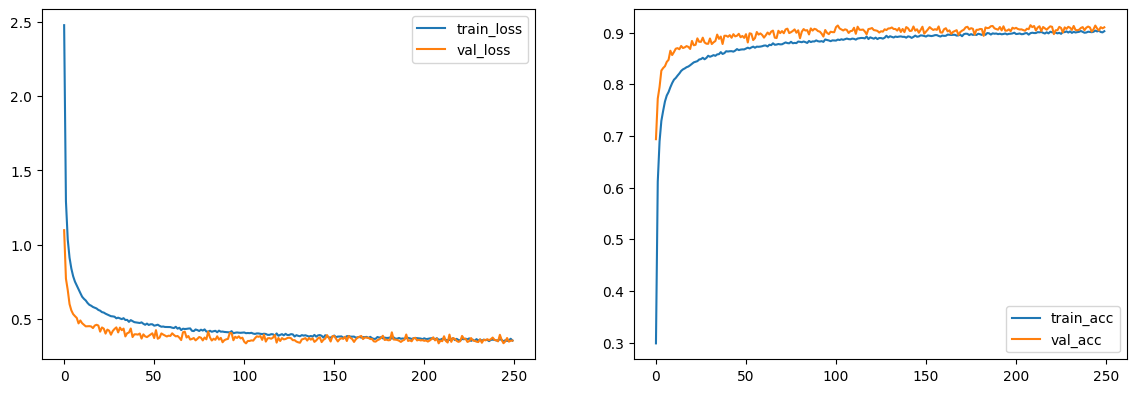

In [44]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.45))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.45))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.45))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Aktivierungsfunktionen

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 2.4736 - accuracy: 0.3071 - val_loss: 1.1737 - val_accuracy: 0.6597
Epoch 2/125
680/680 [==============================] - 19s 28ms/step - loss: 0.9895 - accuracy: 0.7243 - val_loss: 0.7272 - val_accuracy: 0.7933
Epoch 3/125
680/680 [==============================] - 20s 29ms/step - loss: 0.6883 - accuracy: 0.8077 - val_loss: 0.6307 - val_accuracy: 0.8129
Epoch 4/125
680/680 [==============================] - 20s 30ms/step - loss: 0.5458 - accuracy: 0.8478 - val_loss: 0.5645 - val_accuracy: 0.8390
Epoch 5/125
680/680 [==============================] - 20s 29ms/step - loss: 0.4564 - accuracy: 0.8726 - val_loss: 0.5128 - val_accuracy: 0.8558
Epoch 6/125
680/680 [==============================] - 20s 29ms/step - loss: 0.3952 - accuracy: 0.8886 - val_loss: 0.4967 - val_accuracy: 0.8663
Epoch 7/125
680/680 [==============================] - 19s 28ms/step - loss: 0.3457 - accuracy: 0.9037 - val_loss: 0.4404 - val_ac

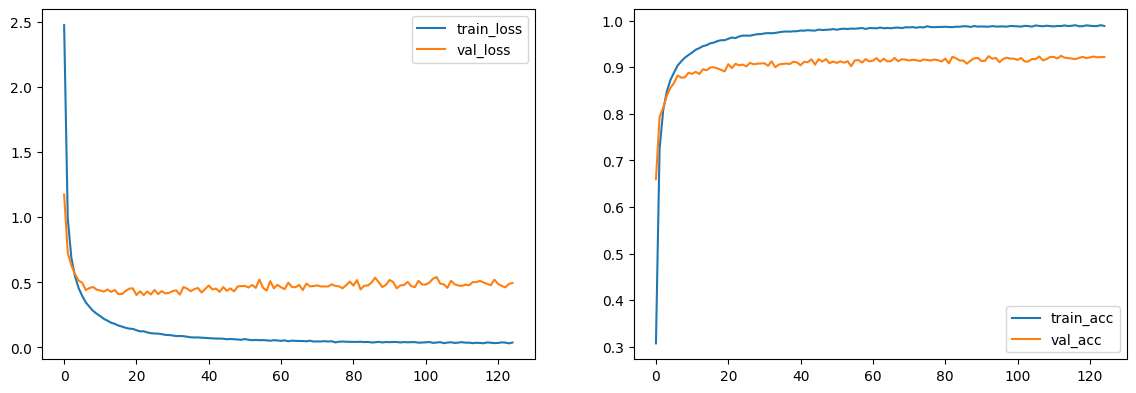

In [42]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='sigmoid', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='sigmoid'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='sigmoid'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 2.0788 - accuracy: 0.4107 - val_loss: 0.9402 - val_accuracy: 0.7295
Epoch 2/125
680/680 [==============================] - 19s 28ms/step - loss: 0.9641 - accuracy: 0.7172 - val_loss: 0.6226 - val_accuracy: 0.8191
Epoch 3/125
680/680 [==============================] - 19s 28ms/step - loss: 0.7736 - accuracy: 0.7718 - val_loss: 0.5517 - val_accuracy: 0.8486
Epoch 4/125
680/680 [==============================] - 20s 29ms/step - loss: 0.6679 - accuracy: 0.8028 - val_loss: 0.5099 - val_accuracy: 0.8563
Epoch 5/125
680/680 [==============================] - 20s 30ms/step - loss: 0.5902 - accuracy: 0.8281 - val_loss: 0.5029 - val_accuracy: 0.8586
Epoch 6/125
680/680 [==============================] - 19s 29ms/step - loss: 0.5497 - accuracy: 0.8381 - val_loss: 0.4593 - val_accuracy: 0.8685
Epoch 7/125
680/680 [==============================] - 20s 29ms/step - loss: 0.5190 - accuracy: 0.8477 - val_loss: 0.4767 - val_ac

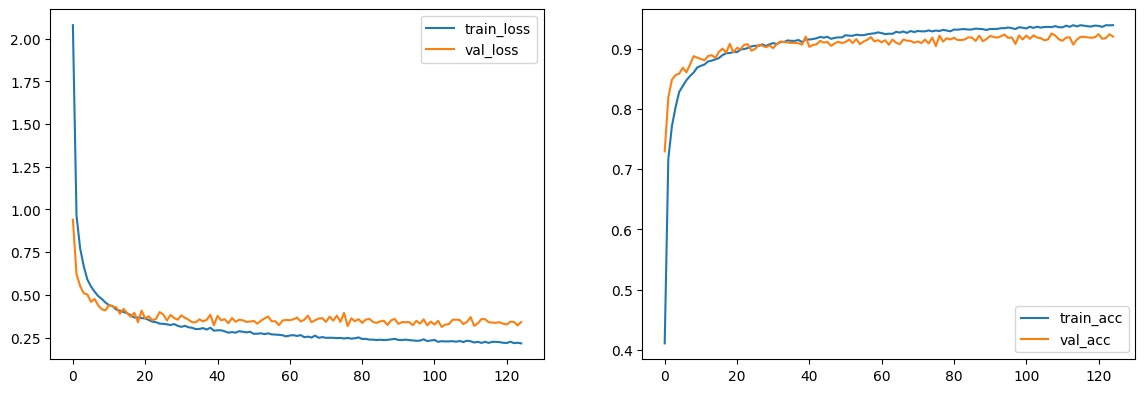

In [43]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Optimizer

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 3.7776 - accuracy: 0.0294 - val_loss: 3.6949 - val_accuracy: 0.0714
Epoch 2/125
680/680 [==============================] - 20s 29ms/step - loss: 3.6985 - accuracy: 0.0495 - val_loss: 3.6181 - val_accuracy: 0.1325
Epoch 3/125
680/680 [==============================] - 20s 30ms/step - loss: 3.6218 - accuracy: 0.0744 - val_loss: 3.4968 - val_accuracy: 0.1842
Epoch 4/125
680/680 [==============================] - 18s 27ms/step - loss: 3.5028 - accuracy: 0.1045 - val_loss: 3.3178 - val_accuracy: 0.2346
Epoch 5/125
680/680 [==============================] - 20s 29ms/step - loss: 3.3422 - accuracy: 0.1360 - val_loss: 3.0901 - val_accuracy: 0.2729
Epoch 6/125
680/680 [==============================] - 20s 29ms/step - loss: 3.1523 - accuracy: 0.1740 - val_loss: 2.8244 - val_accuracy: 0.3223
Epoch 7/125
680/680 [==============================] - 21s 31ms/step - loss: 2.9651 - accuracy: 0.2074 - val_loss: 2.5818 - val_ac

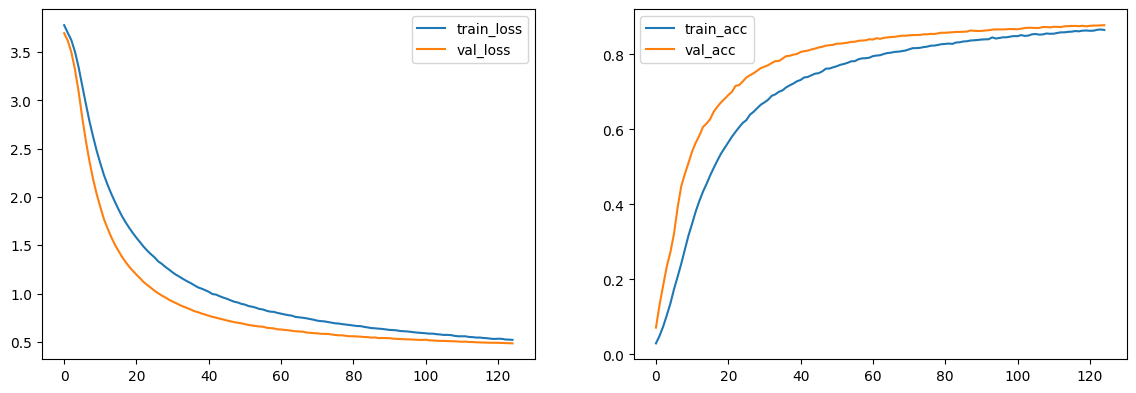

In [45]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adagrad',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/250
680/680 [==============================] - 23s 31ms/step - loss: 3.8692 - accuracy: 0.0235 - val_loss: 3.7601 - val_accuracy: 0.0196
Epoch 2/250
680/680 [==============================] - 22s 33ms/step - loss: 3.8185 - accuracy: 0.0242 - val_loss: 3.7424 - val_accuracy: 0.0337
Epoch 3/250
680/680 [==============================] - 23s 34ms/step - loss: 3.7895 - accuracy: 0.0271 - val_loss: 3.7304 - val_accuracy: 0.0523
Epoch 4/250
680/680 [==============================] - 22s 33ms/step - loss: 3.7706 - accuracy: 0.0297 - val_loss: 3.7196 - val_accuracy: 0.0732
Epoch 5/250
680/680 [==============================] - 23s 33ms/step - loss: 3.7567 - accuracy: 0.0328 - val_loss: 3.7103 - val_accuracy: 0.0891
Epoch 6/250
680/680 [==============================] - 22s 33ms/step - loss: 3.7452 - accuracy: 0.0349 - val_loss: 3.7000 - val_accuracy: 0.1074
Epoch 7/250
680/680 [==============================] - 25s 37ms/step - loss: 3.7339 - accuracy: 0.0390 - val_loss: 3.6901 - val_ac

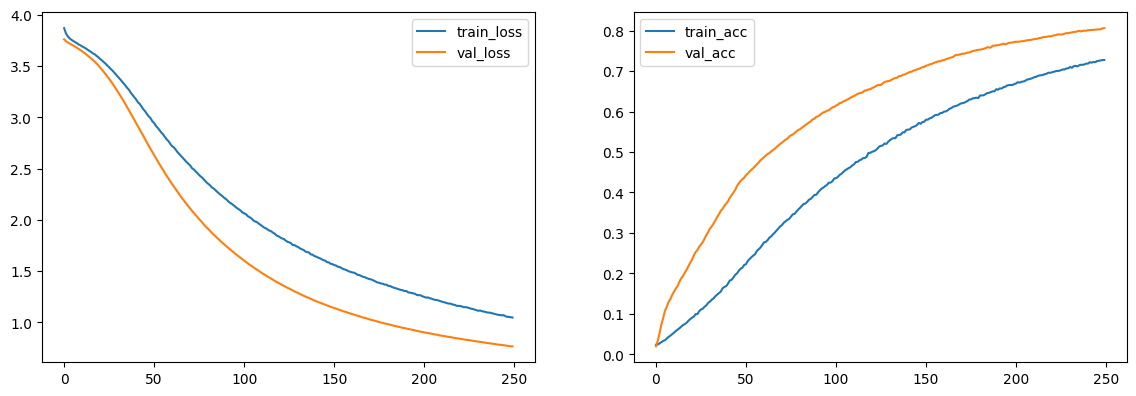

In [47]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

In [6]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(512, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(256, activation='relu'))
dnn_50_dropout.add(Dropout(0.4))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=500,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

2023-01-24 13:06:24.316205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
680/680 [==============================] - 29s 42ms/step - loss: 3.8539 - accuracy: 0.0225 - val_loss: 3.7521 - val_accuracy: 0.0275
Epoch 2/500
680/680 [==============================] - 32s 46ms/step - loss: 3.8060 - accuracy: 0.0253 - val_loss: 3.7283 - val_accuracy: 0.0622
Epoch 3/500
680/680 [==============================] - 33s 49ms/step - loss: 3.7823 - accuracy: 0.0274 - val_loss: 3.7151 - val_accuracy: 0.0840
Epoch 4/500
680/680 [==============================] - 33s 48ms/step - loss: 3.7650 - accuracy: 0.0295 - val_loss: 3.7032 - val_accuracy: 0.1002
Epoch 5/500
680/680 [==============================] - 30s 44ms/step - loss: 3.7530 - accuracy: 0.0323 - val_loss: 3.6931 - val_accuracy: 0.1151
Epoch 6/500
680/680 [==============================] - 30s 44ms/step - loss: 3.7420 - accuracy: 0.0367 - val_loss: 3.6834 - val_accuracy: 0.1264
Epoch 7/500
680/680 [==============================] - 31s 45ms/step - loss: 3.7316 - accuracy: 0.0374 - val_loss: 3.6732 - val_ac

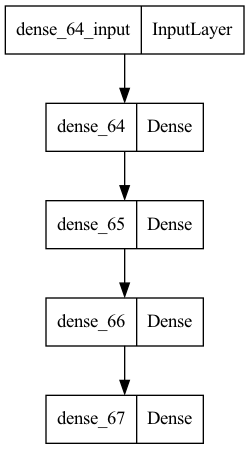

In [49]:
plot_model(dnn_50_dropout, to_file='dnn_50_dropout.png')
plot_model(dnn_no_dropout, to_file='dnn_no_dropout.png')

# Convolution

Epoch 1/200
680/680 [==============================] - 43s 61ms/step - loss: 0.9432 - accuracy: 0.7697 - val_loss: 0.6524 - val_accuracy: 0.8459
Epoch 2/200
680/680 [==============================] - 41s 60ms/step - loss: 0.1887 - accuracy: 0.9603 - val_loss: 0.5949 - val_accuracy: 0.8644
Epoch 3/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0899 - accuracy: 0.9810 - val_loss: 0.5243 - val_accuracy: 0.8894
Epoch 4/200
680/680 [==============================] - 40s 58ms/step - loss: 0.0596 - accuracy: 0.9864 - val_loss: 0.6587 - val_accuracy: 0.8732
Epoch 5/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.6261 - val_accuracy: 0.8841
Epoch 6/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.6919 - val_accuracy: 0.8800
Epoch 7/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.6445 - val_ac

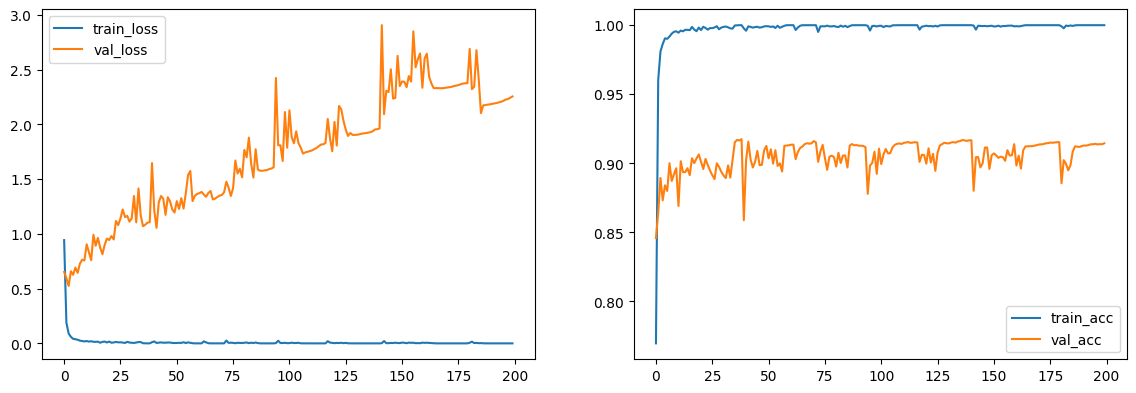

In [65]:
convolution_color_hist = Sequential()
convolution_color_hist.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
convolution_color_hist.add(MaxPooling2D(pool_size=2))
convolution_color_hist.add(Flatten())
convolution_color_hist.add(Dense(512, activation='relu'))
convolution_color_hist.add(Dense(43, activation='softmax'))
convolution_color_hist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


convolution_color_hist = convolution_color_hist.fit(x_train_color, y_train_color, 
        epochs=200,
        batch_size=128,
        verbose=1,
        validation_data=(x_test_color, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(convolution_color_hist.history['loss'], label='train_loss')
plt.plot(convolution_color_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(convolution_color_hist.history['accuracy'], label='train_acc')
plt.plot(convolution_color_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

In [ ]:
convolution_color_hist = Sequential()
convolution_color_hist.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
convolution_color_hist.add(MaxPooling2D(pool_size=2))
convolution_color_hist.add(Flatten())
convolution_color_hist.add(Dense(512, activation='relu'))
convolution_color_hist.add(Dropout(0.45))
convolution_color_hist.add(Dense(256, activation='relu'))
convolution_color_hist.add(Dropout(0.3))
convolution_color_hist.add(Dense(43, activation='softmax'))
convolution_color_hist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


convolution_color_hist = convolution_color_hist.fit(x_train_color, y_train_color, 
        epochs=200,
        batch_size=128,
        verbose=1,
        validation_data=(x_test_color, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(convolution_color_hist.history['loss'], label='train_loss')
plt.plot(convolution_color_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(convolution_color_hist.history['accuracy'], label='train_acc')
plt.plot(convolution_color_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/200
680/680 [==============================] - 43s 61ms/step - loss: 0.9432 - accuracy: 0.7697 - val_loss: 0.6524 - val_accuracy: 0.8459
Epoch 2/200
680/680 [==============================] - 41s 60ms/step - loss: 0.1887 - accuracy: 0.9603 - val_loss: 0.5949 - val_accuracy: 0.8644
Epoch 3/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0899 - accuracy: 0.9810 - val_loss: 0.5243 - val_accuracy: 0.8894
Epoch 4/200
680/680 [==============================] - 40s 58ms/step - loss: 0.0596 - accuracy: 0.9864 - val_loss: 0.6587 - val_accuracy: 0.8732
Epoch 5/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.6261 - val_accuracy: 0.8841
Epoch 6/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.6919 - val_accuracy: 0.8800
Epoch 7/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.6445 - val_ac

NameError: name 'convolution_color_hist' is not defined

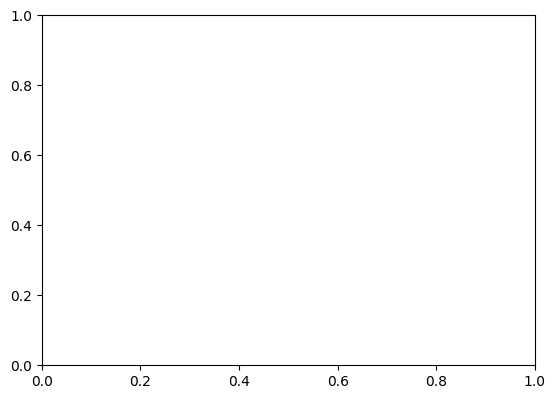

In [3]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(convolution_color_hist.history['loss'], label='train_loss')
plt.plot(convolution_color_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(convolution_color_hist.history['accuracy'], label='train_acc')
plt.plot(convolution_color_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])